#Analizando Atributos e Prevendo AVC com Inteligência Artificiais

##Importanto Bibliotecas

In [276]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Carregando os Dados

In [277]:
#Permitir acesso ao Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [278]:
#Leitura dos Dados
caminho = "/gdrive/My Drive/Medicina/Projetos/Congressos/1_CONGRESSO_CAPIXABA_DE_NEUROLOGIA_2020/AVC/"
arquivo = "AVC_Dados.csv"
df_0 = pd.read_csv(caminho+arquivo)

##Visualizando os Dados

In [279]:
df_0.head()

,id,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,30669,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,NaN,0
1,30468,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0
2,16523,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,NaN,0
3,56543,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,46136,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,NaN,0


In [280]:
df_0.shape

(43400, 12)

In [282]:
df_0['avc'].value_counts()

0    42617
1      783
Name: avc, dtype: int64

In [283]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)


print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(df_0["avc"].values))

Prevalência da classe positiva: 0.018


##01 - Análise Exploratória

In [171]:
#Excluindo a Coluna "id"
df_1 = df_0.drop("id", axis=1)

In [172]:
df_1.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,NaN,0
1,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0
2,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,NaN,0
3,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,NaN,0


In [173]:
df_1.shape

(43400, 11)

In [174]:
del(df_0)

###Tipo de Dados das Colunas

In [175]:
df_1.dtypes

sexo                    object
idade                  float64
hipertensao              int64
doenca_coracao           int64
casado                  object
tipo_trabalho           object
tipo_residencia         object
media_nivel_glicose    float64
imc                    float64
status_tabagismo        object
avc                      int64
dtype: object

###Alterando os Tipos de Dados das Colunas

In [176]:
#Criando um dicionário para os tipo de dados
dict_type = {
    "sexo": np.object,
    "idade": np.float, 
    "hipertensao": np.object, 
    "doenca_coracao": np.object, 
    "casado": np.object,
    "tipo_trabalho": np.object,
    "tipo_residencia": np.object,
    "imc": np.float,
    "status_tabagismo": np.object,
    "avc": np.object
    }

In [177]:
dict_type

{'avc': object,
 'casado': object,
 'doenca_coracao': object,
 'hipertensao': object,
 'idade': float,
 'imc': float,
 'sexo': object,
 'status_tabagismo': object,
 'tipo_residencia': object,
 'tipo_trabalho': object}

In [178]:
df_2 = df_1.astype(dict_type)

In [179]:
df_2.dtypes

sexo                    object
idade                  float64
hipertensao             object
doenca_coracao          object
casado                  object
tipo_trabalho           object
tipo_residencia         object
media_nivel_glicose    float64
imc                    float64
status_tabagismo        object
avc                     object
dtype: object

In [180]:
del(df_1)

###Descrição Estatíticas dos Atributos

In [181]:
#Extraindo as Colunas Categóricas
cols_cat = df_2.dtypes[df_2.dtypes == 'object'].index
cols_cat

Index(['sexo', 'hipertensao', 'doenca_coracao', 'casado', 'tipo_trabalho',
       'tipo_residencia', 'status_tabagismo', 'avc'],
      dtype='object')

In [182]:
# Extraindo as Colunas Numéricas
cols_num = [item for item in list(df_2.columns) if item not in list(cols_cat)]
cols_num

['idade', 'media_nivel_glicose', 'imc']

In [183]:
#Descrição das Colunas Categóricas
df_2[cols_cat].describe()

,sexo,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,status_tabagismo,avc
count,43400,43400,43400,43400,43400,43400,30108,43400
unique,3,2,2,2,5,2,3,2
top,Feminino,0,0,Yes,Privado,Urbana,nunca fumou,0
freq,25665,39339,41338,27938,24834,21756,16053,42617


In [184]:
#Descrição das Colunas Numéricas
df_2[cols_num].describe()

,idade,media_nivel_glicose,imc
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


###Distribuição da Classe AVC

In [185]:
df_2["avc"].value_counts()

0    42617
1      783
Name: avc, dtype: int64

###Contagem da Quantidade de Volores Null

In [186]:
df_2.isna().sum()

sexo                       0
idade                      0
hipertensao                0
doenca_coracao             0
casado                     0
tipo_trabalho              0
tipo_residencia            0
media_nivel_glicose        0
imc                     1462
status_tabagismo       13292
avc                        0
dtype: int64

##02 - Trabalhando com NULL

###IMC

In [187]:
#Quantidade de volores NULL
df_2['imc'].isna().sum()

1462

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff75dc2feb8>]],
      dtype=object)

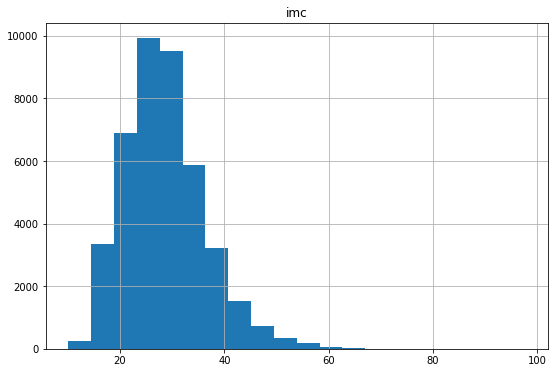

In [188]:
#Checando a Distribuição do IMC com um Histograma
df_2.hist(column="imc", figsize=(9, 6), bins=20)

Pelo histograma, percebece que o valor do IMC entre 20 e 40 (precisamente entre 20 e 30) é o mais comum, o que é compativel com a Média (28.605038) e Mediana (27.700000)

Logo vamo imputar a média nos valores ausentes.

In [189]:
imc_media = df_2["imc"].mean()
imc_media

28.605038390004545

In [190]:
#Gerando a nova lista de IMC
novo_imc = np.where(df_2["imc"].isnull(), imc_media, df_2["imc"])
novo_imc

array([18. , 39.2, 17.6, ..., 28.9, 33.2, 20.6])

In [191]:
df_2["imc"] = novo_imc

In [192]:
#Quantidade de volores NULL
df_2['imc'].isna().sum()

0

In [193]:
df_2["imc"].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7550c6eb8>]],
      dtype=object)

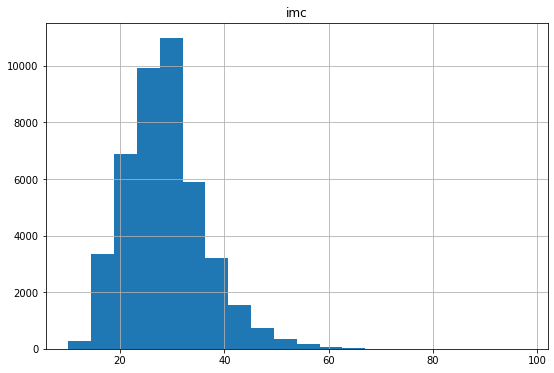

In [194]:
#Checando a Distribuição do IMC com um Histograma
df_2.hist(column="imc", figsize=(9, 6), bins=20)

###Status_Tabagismo

In [195]:
#Quantidade de volores NULL
df_2['status_tabagismo'].isna().sum()

13292

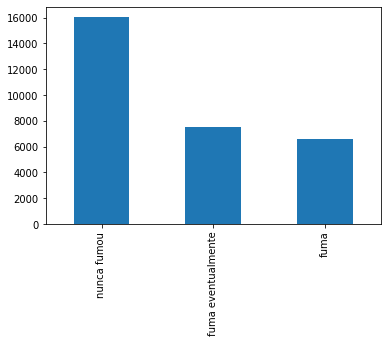

In [196]:
#Checando a Distribuição num Gráfico de Barra
df_2['status_tabagismo'].value_counts().plot(kind='bar')

Vamos preencher os valores missing com uma nova categoria chamada "desconhecido"

In [197]:
novo_status_tabagismo = np.where(df_2["status_tabagismo"].isnull(), "desconhecido", df_2["status_tabagismo"])
novo_status_tabagismo

array(['desconhecido', 'nunca fumou', 'desconhecido', ...,
       'fuma eventualmente', 'nunca fumou', 'nunca fumou'], dtype=object)

In [198]:
df_2["status_tabagismo"] = novo_status_tabagismo

In [199]:
#Quantidade de volores NULL
df_2['status_tabagismo'].isna().sum()

0

In [200]:
df_2["status_tabagismo"].describe()

count           43400
unique              4
top       nunca fumou
freq            16053
Name: status_tabagismo, dtype: object

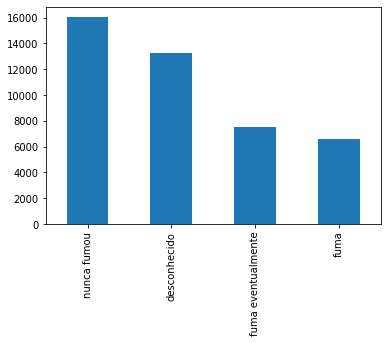

In [201]:
#Checando a Distribuição num Gráfico de Barra
df_2['status_tabagismo'].value_counts().plot(kind='bar')

###Verificando

In [202]:
df_2.isna().sum()

sexo                   0
idade                  0
hipertensao            0
doenca_coracao         0
casado                 0
tipo_trabalho          0
tipo_residencia        0
media_nivel_glicose    0
imc                    0
status_tabagismo       0
avc                    0
dtype: int64

##03 - Outliers

Apenas na colunas numéricas

In [203]:
df_2[cols_num].describe()

,idade,media_nivel_glicose,imc
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.638023
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,28.100000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


###Idade


In [204]:
df_2["idade"].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: idade, dtype: float64

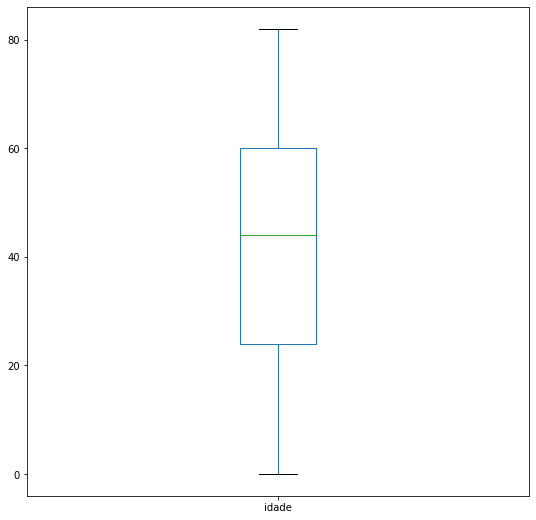

In [205]:
#Verificando com um Gráfico de Caixa
df_2["idade"].plot(kind="box", figsize=(9,9))

###Media_Nivel_Glicose

In [206]:
df_2["media_nivel_glicose"].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: media_nivel_glicose, dtype: float64

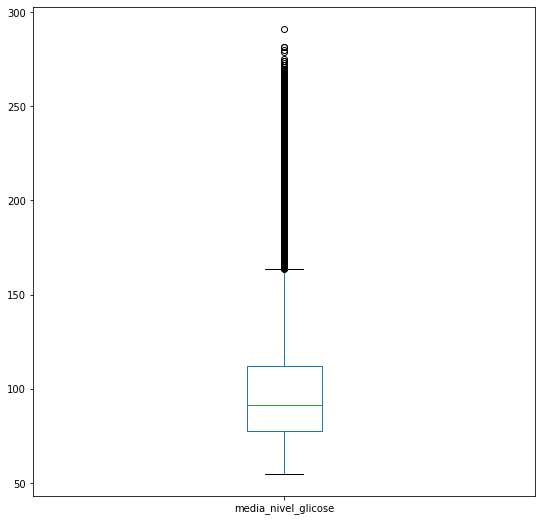

In [207]:
#Verificando com um Gráfico de Caixa
df_2["media_nivel_glicose"].plot(kind="box", figsize=(9,9))

In [208]:
#Identificando o Outliers
index1 = np.where(df_2["media_nivel_glicose"] == max(df_2["media_nivel_glicose"]) )

df_2.loc[index1]

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
38446,Feminino,80.0,0,0,Yes,Privado,Rural,291.05,28.7,nunca fumou,0


In [209]:
df_3 = df_2.drop(index1[0])

In [210]:
del(df_2)

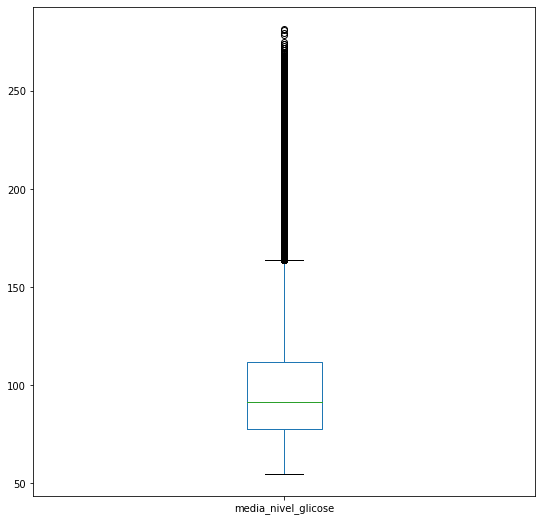

In [211]:
#Verificando com um Gráfico de Caixa
df_3["media_nivel_glicose"].plot(kind="box", figsize=(9,9))

###IMC

In [212]:
df_3['imc'].describe()

count    43399.000000
mean        28.605036
std          7.638111
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

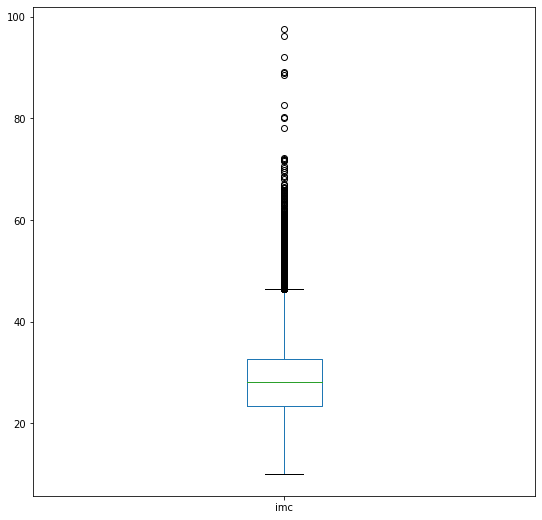

In [213]:
#Verificando com um Gráfico de Caixa
df_3["imc"].plot(kind="box", figsize=(9,9))

In [214]:
#Filtrando (removendo) todos os registros com IMC > 60
df_4 = df_3[df_3["imc"] <= 60]

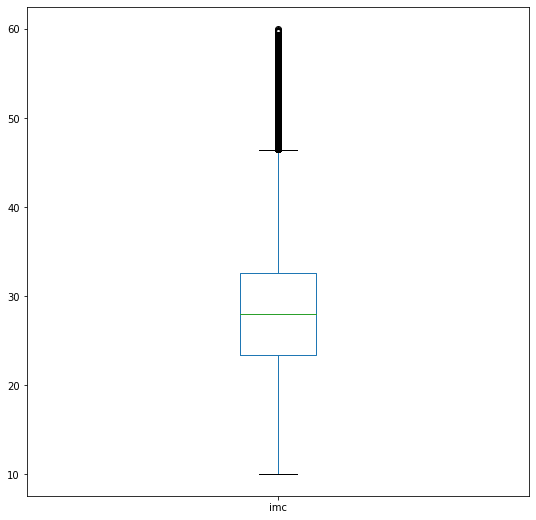

In [215]:
#Verificando com um Gráfico de Caixa
df_4["imc"].plot(kind="box", figsize=(9,9))

In [216]:
del(df_3)

###Verificando

In [217]:
df_4[cols_num].describe()

,idade,media_nivel_glicose,imc
count,43310.00000,43310.000000,43310.000000
mean,42.21299,104.441648,28.526975
std,22.53342,43.059747,7.439535
min,0.08000,55.000000,10.100000
25%,24.00000,77.540000,23.400000
50%,44.00000,91.570000,28.000000
75%,60.00000,112.030000,32.600000
max,82.00000,281.590000,60.000000


##04 - Novas Colunas


In [218]:
df_4.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,desconhecido,0
1,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0
2,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,desconhecido,0
3,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,desconhecido,0


In [219]:
df_4.shape

(43310, 11)

In [220]:
df_4[cols_cat].describe()

,sexo,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,status_tabagismo,avc
count,43310,43310,43310,43310,43310,43310,43310,43310
unique,3,2,2,2,5,2,4,2
top,Feminino,0,0,Yes,Privado,Urbana,nunca fumou,0
freq,25606,39271,41251,27869,24770,21712,16017,42527


In [221]:
df_4[cols_num].describe()

,idade,media_nivel_glicose,imc
count,43310.00000,43310.000000,43310.000000
mean,42.21299,104.441648,28.526975
std,22.53342,43.059747,7.439535
min,0.08000,55.000000,10.100000
25%,24.00000,77.540000,23.400000
50%,44.00000,91.570000,28.000000
75%,60.00000,112.030000,32.600000
max,82.00000,281.590000,60.000000


###IMC Classes

In [222]:
#Função para Identificar a Classe de Acordo com o IMC
def classe_imc(imc):
  if (imc < 18.5):
    return "Baixo Peso"
  elif (imc < 25):
    return "Normal"
  elif (imc < 30):
    return "Sobre Peso"
  elif (imc < 35):
    return "Obesidade I"
  elif (imc < 40):
    return "Obesidade II"
  else:
    return "Obesidade III"

In [223]:
#Aplicando a Função no DataSet
df_4["IMC_Classe"] = df_4["imc"].apply(classe_imc)

In [224]:
df_4.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc,IMC_Classe
0,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,desconhecido,0,Baixo Peso
1,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0,Obesidade II
2,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,desconhecido,0,Baixo Peso
3,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0,Obesidade II
4,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,desconhecido,0,Normal


In [225]:
df_4.shape

(43310, 12)

###Glicemia

In [226]:
#Função para identificar a Faixa de Glicemia
def classe_glicemia(glicose):
  if (glicose < 100):
    return "Normal"
  elif (glicose < 125):
    return "Alterada"
  else:
    return "Diabetico"

In [227]:
df_4["Glicemia"] = df_4["media_nivel_glicose"].apply(classe_glicemia)

In [228]:
df_4.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc,IMC_Classe,Glicemia
0,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,desconhecido,0,Baixo Peso,Normal
1,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0,Obesidade II,Normal
2,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,desconhecido,0,Baixo Peso,Alterada
3,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0,Obesidade II,Normal
4,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,desconhecido,0,Normal,Diabetico


In [229]:
df_4.shape

(43310, 13)

###One-Hot Encoding

Nas Colunas:
- tipo_trabalho
- status_tabagismo

In [230]:
df_5 = pd.get_dummies(df_4, columns = ['tipo_trabalho','status_tabagismo'], prefix = ["trabalho",'tabagismo'])

In [231]:
df_5.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,Masculino,3.0,0,0,No,Rural,95.12,18.0,0,Baixo Peso,Normal,0,0,0,0,1,1,0,0,0
1,Masculino,58.0,1,0,Yes,Urbana,87.96,39.2,0,Obesidade II,Normal,0,0,1,0,0,0,0,0,1
2,Feminino,8.0,0,0,No,Urbana,110.89,17.6,0,Baixo Peso,Alterada,0,0,1,0,0,1,0,0,0
3,Feminino,70.0,0,0,Yes,Rural,69.04,35.9,0,Obesidade II,Normal,0,0,1,0,0,0,0,1,0
4,Masculino,14.0,0,0,No,Rural,161.28,19.1,0,Normal,Diabetico,0,1,0,0,0,1,0,0,0


In [232]:
df_5.shape

(43310, 20)

In [233]:
del(df_4)

##05 - Transformado Valores Texto em Numéricos

###Sexo

In [234]:
df_5["sexo"].unique()

array(['Masculino', 'Feminino', 'Outro'], dtype=object)

In [235]:
def converter_sexo(sexo):
  if (sexo == "Masculino"):
    return 1
  elif (sexo == "Feminino"):
    return 0
  else:
    return 2

In [236]:
df_5["sexo"] = df_5["sexo"].apply(converter_sexo)

In [237]:
df_5.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,No,Rural,95.12,18.0,0,Baixo Peso,Normal,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,Yes,Urbana,87.96,39.2,0,Obesidade II,Normal,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,No,Urbana,110.89,17.6,0,Baixo Peso,Alterada,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,Yes,Rural,69.04,35.9,0,Obesidade II,Normal,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,No,Rural,161.28,19.1,0,Normal,Diabetico,0,1,0,0,0,1,0,0,0


###Casado

In [238]:
df_5["casado"].unique()

array(['No', 'Yes'], dtype=object)

In [239]:
def converter_casado(casado):
  if (casado == "Yes"):
    return 1
  else:
    return 0

In [240]:
df_5["casado"] = df_5["casado"].apply(converter_casado)

In [241]:
df_5.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,Rural,95.12,18.0,0,Baixo Peso,Normal,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,Urbana,87.96,39.2,0,Obesidade II,Normal,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,0,Urbana,110.89,17.6,0,Baixo Peso,Alterada,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,1,Rural,69.04,35.9,0,Obesidade II,Normal,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,Rural,161.28,19.1,0,Normal,Diabetico,0,1,0,0,0,1,0,0,0


###Tipo_Residencia

In [242]:
df_5["tipo_residencia"].unique()

array(['Rural', 'Urbana'], dtype=object)

In [243]:
def converter_residencia(residencia):
  if (residencia == "Urbana"):
    return 1
  else:
    return 0

In [244]:
df_5["tipo_residencia"] = df_5["tipo_residencia"].apply(converter_residencia)

In [245]:
df_5.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,0,95.12,18.0,0,Baixo Peso,Normal,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,1,87.96,39.2,0,Obesidade II,Normal,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,0,1,110.89,17.6,0,Baixo Peso,Alterada,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,1,0,69.04,35.9,0,Obesidade II,Normal,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,0,161.28,19.1,0,Normal,Diabetico,0,1,0,0,0,1,0,0,0


###IMC_Classe

In [246]:
df_5["IMC_Classe"].unique()

array(['Baixo Peso', 'Obesidade II', 'Normal', 'Obesidade III',
       'Sobre Peso', 'Obesidade I'], dtype=object)

In [247]:
def converter_imc(imc):
  if (imc == "Baixo Peso"):
    return 0
  elif (imc == "Normal"):
    return 1
  elif (imc == "Sobre Peso"):
    return 2
  elif (imc == "Obesidade I"):
    return 3
  elif (imc == "Obesidade 2"):
    return 4
  else:
    return 5

In [248]:
df_5["IMC_Classe"] = df_5["IMC_Classe"].apply(converter_imc)

In [249]:
df_5.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,0,95.12,18.0,0,0,Normal,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,1,87.96,39.2,0,5,Normal,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,0,1,110.89,17.6,0,0,Alterada,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,1,0,69.04,35.9,0,5,Normal,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,0,161.28,19.1,0,1,Diabetico,0,1,0,0,0,1,0,0,0


###Glicemia

In [250]:
df_5["Glicemia"].unique()

array(['Normal', 'Alterada', 'Diabetico'], dtype=object)

In [251]:
def converter_glicemia(glicemia):
  if (glicemia == "Normal"):
    return 0
  elif (glicemia == "Alterada"):
    return 1
  else:
    return 2

In [252]:
df_5["Glicemia"] = df_5["Glicemia"].apply(converter_glicemia)

In [253]:
df_5.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,1,87.96,39.2,0,5,0,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,1,0,69.04,35.9,0,5,0,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,0,161.28,19.1,0,1,2,0,1,0,0,0,1,0,0,0


##06 - Principais Colunas

###Avaliando o Tipo de cada Coluna


In [254]:
df_5.dtypes

sexo                              int64
idade                           float64
hipertensao                      object
doenca_coracao                   object
casado                            int64
tipo_residencia                   int64
media_nivel_glicose             float64
imc                             float64
avc                              object
IMC_Classe                        int64
Glicemia                          int64
trabalho_Autonomo                 uint8
trabalho_Nunca_trabalhou          uint8
trabalho_Privado                  uint8
trabalho_Servidor_Publico         uint8
trabalho_crianca                  uint8
tabagismo_desconhecido            uint8
tabagismo_fuma                    uint8
tabagismo_fuma eventualmente      uint8
tabagismo_nunca fumou             uint8
dtype: object

###Alterando o Tipo das Colunas


In [255]:
dict_type_2 = {
    'sexo': np.object,
    'idade': np.int,
    'hipertensao': np.object,
    'doenca_coracao': np.object,
    'casado': np.object,
    'tipo_residencia': np.object,
    'media_nivel_glicose': np.float,
    'imc': np.float,
    'avc': np.object,
    'IMC_Classe': np.object,
    'Glicemia': np.object,
    'trabalho_Autonomo': np.object,
    'trabalho_Nunca_trabalhou': np.object,
    'trabalho_Privado': np.object,
    'trabalho_Servidor_Publico': np.object,
    'trabalho_crianca': np.object,
    'tabagismo_desconhecido': np.object,
    'tabagismo_fuma': np.object,
    'tabagismo_fuma eventualmente': np.object,
    'tabagismo_nunca fumou': np.object,
}

In [256]:
dict_type_2

{'Glicemia': object,
 'IMC_Classe': object,
 'avc': object,
 'casado': object,
 'doenca_coracao': object,
 'hipertensao': object,
 'idade': int,
 'imc': float,
 'media_nivel_glicose': float,
 'sexo': object,
 'tabagismo_desconhecido': object,
 'tabagismo_fuma': object,
 'tabagismo_fuma eventualmente': object,
 'tabagismo_nunca fumou': object,
 'tipo_residencia': object,
 'trabalho_Autonomo': object,
 'trabalho_Nunca_trabalhou': object,
 'trabalho_Privado': object,
 'trabalho_Servidor_Publico': object,
 'trabalho_crianca': object}

In [257]:
df_6 = df_5.astype(dict_type_2)

In [258]:
df_6.head()

,sexo,idade,hipertensao,doenca_coracao,casado,tipo_residencia,media_nivel_glicose,imc,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3,0,0,0,0,95.12,18.0,0,0,0,0,0,0,0,1,1,0,0,0
1,1,58,1,0,1,1,87.96,39.2,0,5,0,0,0,1,0,0,0,0,0,1
2,0,8,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,1,0,0,0
3,0,70,0,0,1,0,69.04,35.9,0,5,0,0,0,1,0,0,0,0,1,0
4,1,14,0,0,0,0,161.28,19.1,0,1,2,0,1,0,0,0,1,0,0,0


In [259]:
df_6.dtypes

sexo                             object
idade                             int64
hipertensao                      object
doenca_coracao                   object
casado                           object
tipo_residencia                  object
media_nivel_glicose             float64
imc                             float64
avc                              object
IMC_Classe                       object
Glicemia                         object
trabalho_Autonomo                object
trabalho_Nunca_trabalhou         object
trabalho_Privado                 object
trabalho_Servidor_Publico        object
trabalho_crianca                 object
tabagismo_desconhecido           object
tabagismo_fuma                   object
tabagismo_fuma eventualmente     object
tabagismo_nunca fumou            object
dtype: object

In [260]:
del(df_5)

###Tabela de Correlação

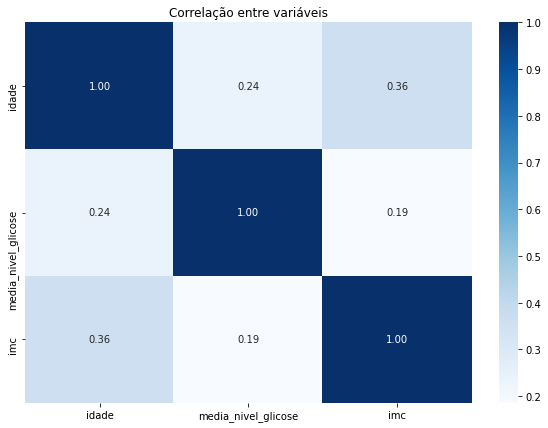

In [261]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_6.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()

###Excluindo Colunas Desnecessárias

In [262]:
df_6.shape

(43310, 20)

In [263]:
cols_desnecessarias = [
                       'casado',
                       'media_nivel_glicose',
                       #'Glicemia',
                       'imc',
                       'tipo_residencia'
                       ]

df_7 = df_6.drop(cols_desnecessarias, axis=1)

In [264]:
df_7.head()

,sexo,idade,hipertensao,doenca_coracao,avc,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,1,58,1,0,0,5,0,0,0,1,0,0,0,0,0,1
2,0,8,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,70,0,0,0,5,0,0,0,1,0,0,0,0,1,0
4,1,14,0,0,0,1,2,0,1,0,0,0,1,0,0,0


In [265]:
df_7.shape

(43310, 16)

In [266]:
del(df_6)

##07 - Modelagem

In [267]:
#Salvando as colunas dos DataFrame
cols_input = list(df_7.drop('avc', axis=1).columns)
cols_input

['sexo',
 'idade',
 'hipertensao',
 'doenca_coracao',
 'IMC_Classe',
 'Glicemia',
 'trabalho_Autonomo',
 'trabalho_Nunca_trabalhou',
 'trabalho_Privado',
 'trabalho_Servidor_Publico',
 'trabalho_crianca',
 'tabagismo_desconhecido',
 'tabagismo_fuma',
 'tabagismo_fuma eventualmente',
 'tabagismo_nunca fumou']

In [268]:
cols_input.append('avc')
cols_input

['sexo',
 'idade',
 'hipertensao',
 'doenca_coracao',
 'IMC_Classe',
 'Glicemia',
 'trabalho_Autonomo',
 'trabalho_Nunca_trabalhou',
 'trabalho_Privado',
 'trabalho_Servidor_Publico',
 'trabalho_crianca',
 'tabagismo_desconhecido',
 'tabagismo_fuma',
 'tabagismo_fuma eventualmente',
 'tabagismo_nunca fumou',
 'avc']

In [269]:
df_7 = df_7[cols_input]

In [270]:
df_7.head()

,sexo,idade,hipertensao,doenca_coracao,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou,avc
0,1,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,58,1,0,5,0,0,0,1,0,0,0,0,0,1,0
2,0,8,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0,70,0,0,5,0,0,0,1,0,0,0,0,1,0,0
4,1,14,0,0,1,2,0,1,0,0,0,1,0,0,0,0


In [106]:
df_7["avc"].value_counts()

0    42527
1      783
Name: avc, dtype: int64

In [107]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)


print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(df_7["avc"].values))

Prevalência da classe positiva: 0.018


In [ ]:
df

###Divisão dos Dados em Treino e Teste

In [108]:
df_7.shape

(43310, 16)

In [109]:
df_7.head()

,sexo,idade,hipertensao,doenca_coracao,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou,avc
0,1,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,58,1,0,5,0,0,0,1,0,0,0,0,0,1,0
2,0,8,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0,70,0,0,5,0,0,0,1,0,0,0,0,1,0,0
4,1,14,0,0,1,2,0,1,0,0,0,1,0,0,0,0


In [110]:
from sklearn.model_selection import train_test_split

y = df_7['avc']
y = y.astype('int')

X = df_7.drop('avc', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [111]:
df_train = X_train
df_train['avc'] = y_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
df_test = X_test
df_test['avc'] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
print(df_train.shape)
print(df_test.shape)

(30317, 16)
(12993, 16)


In [114]:
df_train.head()

,sexo,idade,hipertensao,doenca_coracao,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou,avc
1074,0,46,0,0,5,0,0,0,1,0,0,1,0,0,0,0
452,0,52,0,0,5,0,1,0,0,0,0,1,0,0,0,0
42238,1,33,0,0,1,1,0,0,1,0,0,1,0,0,0,0
40434,0,67,1,0,3,0,1,0,0,0,0,0,1,0,0,0
21069,1,59,0,0,2,0,0,0,0,1,0,0,1,0,0,0


In [115]:
df_test.head()

,sexo,idade,hipertensao,doenca_coracao,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou,avc
35860,0,66,0,0,2,0,1,0,0,0,0,0,0,1,0,0
7142,1,8,0,0,1,0,0,0,0,0,1,1,0,0,0,0
31244,0,80,0,0,1,1,1,0,0,0,0,0,0,1,0,0
39396,0,23,0,0,2,0,0,0,1,0,0,0,0,0,1,0
18390,0,62,0,0,2,0,0,0,1,0,0,1,0,0,0,0


In [116]:
# Verifique a prevalência de cada subconjunto
print(
    "Validação(n = %d): %.3f"
    % (len(df_train), calcula_prevalencia(df_train['avc'].values))
)
print(
    "Teste(n = %d): %.3f"
    % (len(df_test), calcula_prevalencia(df_test['avc'].values))
)


Validação(n = 30317): 0.018
Teste(n = 12993): 0.018


###Salvando os Dados em Disco

In [117]:
# Salvamos todos os datasets em disco no formato csv.
df_train.to_csv(caminho + 'dados_avc_train.csv',index=False)
df_test.to_csv(caminho + 'dados_avc_test.csv',index=False)

# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
import pickle
pickle.dump(cols_input, open(caminho + 'cols_input.sav', 'wb'))

###Definindo os Modelos

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

modelos = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    #'XGBClassifier': XGBClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB()
    }

###Validação Cruzada

In [119]:
#Definindo as Métricas
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, accuracy_score

metricas = {
    "Acuracia": accuracy_score,
    "AUC": roc_auc_score,
    "Recall": recall_score,
    "Precision": precision_score,
    "F1": f1_score,
    }

In [120]:
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from imblearn.combine import SMOTETomek

def validacao_cruzada(X_train_, y_train_, modelos_, metricas_, n_folds = 5, balancear_=False):

  colunas = ['Fold', 'Modelo']
  colunas += metricas_.keys()
  print(colunas)
  print("\n")

  df_resultado_cv = pd.DataFrame(columns= colunas)

  #Iniciando a validação cruzada
  kf = StratifiedKFold(n_folds, shuffle=True, random_state=42)

  #Contador
  n_cv = 0

  for rows_train, rows_valid in kf.split(X_train_, y_train_):
    
    n_cv = n_cv + 1
    print("\n\nCV: ", n_cv, " / ", n_folds)
    
    data_e_hora_atuais = datetime.now()
    data_e_hora_em_texto = data_e_hora_atuais.strftime("%d/%m/%Y %H:%M")
    print(data_e_hora_em_texto, "3 h adiantado")

    print('Treino:', rows_train.shape[0])
    print('Valid:', rows_valid.shape[0])

    X_train_val, X_valid = X_train_.iloc[rows_train], X_train_.iloc[rows_valid]
    y_train_val, y_valid = y_train_.iloc[rows_train], y_train_.iloc[rows_valid]

    #Balanceando os Dados de Treino
    if (balancear_):
      sampling_strategy = 0.9
      ru = SMOTETomek(sampling_strategy=sampling_strategy)
      X_train_val, y_train_val = ru.fit_sample(X_train_val, y_train_val)

    print('Treino Balanceado:', X_train_val.shape[0])
    print('\n')

    #Treinando os Modelos
    for model in modelos_:
      print(model)
      mod = modelos_[model]
      mod.fit(X_train_val, y_train_val)
      p = mod.predict(X_valid)

      linha_dict = {}
      linha_list = []
      linha_dict['Fold'] = n_cv - 1
      linha_list.append(n_cv - 1)

      linha_dict['Modelo'] = model
      linha_list.append(model)

      #Avaliando o Modelo
      for metric in metricas_:
        resultado = metricas[metric](y_valid, p)
        linha_dict[metric] = resultado
        linha_list.append(resultado)

      #Salvando o Resultado em um DataFrame
      print(linha_list)
      #df_resultado_cv = df_resultado_cv.append(linha_list)
      df_resultado_cv.loc[len(df_resultado_cv)] = linha_list
      #df_resultado_cv.loc[-1] = linha_list
      #df_resultado_cv.index = df_resultado_cv.index + 1
      #df_resultado_cv = df_resultado_cv.sort_index()

  return df_resultado_cv

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [121]:
X_train = df_train.drop('avc', axis=1)
y_train = df_train['avc']
y_train = y_train.astype('int')

In [122]:
print(X_train.shape)
print(y_train.shape)

(30317, 15)
(30317,)


In [123]:
X_train.head()

,sexo,idade,hipertensao,doenca_coracao,IMC_Classe,Glicemia,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
1074,0,46,0,0,5,0,0,0,1,0,0,1,0,0,0
452,0,52,0,0,5,0,1,0,0,0,0,1,0,0,0
42238,1,33,0,0,1,1,0,0,1,0,0,1,0,0,0
40434,0,67,1,0,3,0,1,0,0,0,0,0,1,0,0
21069,1,59,0,0,2,0,0,0,0,1,0,0,1,0,0


In [124]:
y_train.head()

1074     0
452      0
42238    0
40434    0
21069    0
Name: avc, dtype: int64

In [125]:
#Validação cruzada com os dados não sendo balanceados
df_cv_nb = validacao_cruzada(X_train, y_train, modelos, metricas, 5, False)

['Fold', 'Modelo', 'Acuracia', 'AUC', 'Recall', 'Precision', 'F1']




CV:  1  /  5
06/11/2020 21:17 3 h adiantado
Treino: 24253
Valid: 6064
Treino Balanceado: 24253


DecisionTreeClassifier
[0, 'DecisionTreeClassifier', 0.9686675461741425, 0.511127736891929, 0.03636363636363636, 0.045454545454545456, 0.0404040404040404]
RandomForestClassifier
[0, 'RandomForestClassifier', 0.9757585751978892, 0.5013543225333618, 0.00909090909090909, 0.02564102564102564, 0.013422818791946308]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0, 'LogisticRegression', 0.9818601583113457, 0.5, 0.0, 0.0, 0.0]
GaussianNB
[0, 'GaussianNB', 0.32684696569920846, 0.6572052401746724, 1.0, 0.026240458015267174, 0.051139005113900515]


CV:  2  /  5
06/11/2020 21:17 3 h adiantado
Treino: 24253
Valid: 6064
Treino Balanceado: 24253


DecisionTreeClassifier
[1, 'DecisionTreeClassifier', 0.9685026385224275, 0.5110437597337161, 0.03636363636363636, 0.0449438202247191, 0.04020100502512562]
RandomForestClassifier
[1, 'RandomForestClassifier', 0.9777374670184696, 0.5023620484319173, 0.00909090909090909, 0.037037037037037035, 0.0145985401459854]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1, 'LogisticRegression', 0.9818601583113457, 0.5, 0.0, 0.0, 0.0]
GaussianNB
[1, 'GaussianNB', 0.3311345646437995, 0.6593886462882096, 1.0, 0.026404224675948152, 0.05144995322731525]


CV:  3  /  5
06/11/2020 21:17 3 h adiantado
Treino: 24254
Valid: 6063
Treino Balanceado: 24254


DecisionTreeClassifier
[2, 'DecisionTreeClassifier', 0.9671779647039419, 0.5194611285913718, 0.05504587155963303, 0.058823529411764705, 0.05687203791469194]
RandomForestClassifier
[2, 'RandomForestClassifier', 0.9746000329869702, 0.5232401007109553, 0.05504587155963303, 0.10526315789473684, 0.07228915662650602]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[2, 'LogisticRegression', 0.9820221012699983, 0.5, 0.0, 0.0, 0.0]
GaussianNB
[2, 'GaussianNB', 0.3349826818406729, 0.6569009192802311, 0.9908256880733946, 0.02609325924136265, 0.05084745762711864]


CV:  4  /  5
06/11/2020 21:17 3 h adiantado
Treino: 24254
Valid: 6063
Treino Balanceado: 24254


DecisionTreeClassifier
[3, 'DecisionTreeClassifier', 0.9696519874649513, 0.5072112495492969, 0.027522935779816515, 0.037037037037037035, 0.031578947368421054]
RandomForestClassifier
[3, 'RandomForestClassifier', 0.9774039254494474, 0.5066549971802164, 0.01834862385321101, 0.0625, 0.028368794326241138]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[3, 'LogisticRegression', 0.9820221012699983, 0.5, 0.0, 0.0, 0.0]
GaussianNB
[3, 'GaussianNB', 0.31024245423057895, 0.648807524353376, 1.0, 0.02540200419482638, 0.04954545454545454]


CV:  5  /  5
06/11/2020 21:17 3 h adiantado
Treino: 24254
Valid: 6063
Treino Balanceado: 24254


DecisionTreeClassifier
[4, 'DecisionTreeClassifier', 0.9701467920171533, 0.5208053998747766, 0.05454545454545454, 0.07228915662650602, 0.0621761658031088]
RandomForestClassifier
[4, 'RandomForestClassifier', 0.9774039254494474, 0.5021936991280179, 0.00909090909090909, 0.034482758620689655, 0.01438848920863309]
LogisticRegression
[4, 'LogisticRegression', 0.9818571664192643, 0.5, 0.0, 0.0, 0.0]
GaussianNB
[4, 'GaussianNB', 0.32838528781131454, 0.6579875692927936, 1.0, 0.026303204208512673, 0.05125815470643057]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
#Validação cruzada com os dados não sendo balanceados
df_cv_nb

,Fold,Modelo,Acuracia,AUC,Recall,Precision,F1
0,0,DecisionTreeClassifier,0.968668,0.511128,0.036364,0.045455,0.040404
1,0,RandomForestClassifier,0.975759,0.501354,0.009091,0.025641,0.013423
2,0,LogisticRegression,0.981860,0.500000,0.000000,0.000000,0.000000
3,0,GaussianNB,0.326847,0.657205,1.000000,0.026240,0.051139
4,1,DecisionTreeClassifier,0.968503,0.511044,0.036364,0.044944,0.040201
5,1,RandomForestClassifier,0.977737,0.502362,0.009091,0.037037,0.014599
6,1,LogisticRegression,0.981860,0.500000,0.000000,0.000000,0.000000
7,1,GaussianNB,0.331135,0.659389,1.000000,0.026404,0.051450
8,2,DecisionTreeClassifier,0.967178,0.519461,0.055046,0.058824,0.056872
9,2,RandomForestClassifier,0.974600,0.523240,0.055046,0.105263,0.072289


In [127]:
#Validação cruzada com os dados sendo balanceados
df_cv_b = validacao_cruzada(X_train, y_train, modelos, metricas, 5, True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


['Fold', 'Modelo', 'Acuracia', 'AUC', 'Recall', 'Precision', 'F1']




CV:  1  /  5
06/11/2020 21:17 3 h adiantado
Treino: 24253
Valid: 6064


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Treino Balanceado: 45238


DecisionTreeClassifier
[0, 'DecisionTreeClassifier', 0.9668535620052771, 0.5102039881515864, 0.03636363636363636, 0.04040404040404041, 0.038277511961722493]
RandomForestClassifier
[0, 'RandomForestClassifier', 0.9732849604221636, 0.5045561425474089, 0.01818181818181818, 0.03571428571428571, 0.024096385542168672]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[0, 'LogisticRegression', 0.7595646437994723, 0.7615628912572144, 0.7636363636363637, 0.055408970976253295, 0.10332103321033209]
GaussianNB
[0, 'GaussianNB', 0.19261213720316622, 0.5888478333893181, 1.0, 0.021973631642029565, 0.04300234558248632]


CV:  2  /  5
06/11/2020 21:18 3 h adiantado
Treino: 24253
Valid: 6064


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Treino Balanceado: 45238


DecisionTreeClassifier
[1, 'DecisionTreeClassifier', 0.9676781002638523, 0.5284697834916176, 0.07272727272727272, 0.0784313725490196, 0.07547169811320754]
RandomForestClassifier
[1, 'RandomForestClassifier', 0.9757585751978892, 0.5058157999206034, 0.01818181818181818, 0.04878048780487805, 0.026490066225165566]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[1, 'LogisticRegression', 0.770778364116095, 0.7538889058539714, 0.7363636363636363, 0.05617198335644938, 0.10438144329896908]
GaussianNB
[1, 'GaussianNB', 0.1970646437994723, 0.5911152166610683, 1.0, 0.022092789716810605, 0.04323049715071724]


CV:  3  /  5
06/11/2020 21:18 3 h adiantado
Treino: 24254
Valid: 6063


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Treino Balanceado: 45242


DecisionTreeClassifier
[2, 'DecisionTreeClassifier', 0.9655286161966024, 0.5276277146194217, 0.07339449541284404, 0.06896551724137931, 0.07111111111111111]
RandomForestClassifier
[2, 'RandomForestClassifier', 0.9721260102259608, 0.5219804433377608, 0.05504587155963303, 0.08333333333333333, 0.06629834254143648]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[2, 'LogisticRegression', 0.7651327725548408, 0.781346592992761, 0.7981651376146789, 0.05842847548690396, 0.10888610763454318]
GaussianNB
[2, 'GaussianNB', 0.19726208147781626, 0.5912831709774942, 1.0, 0.021905144694533762, 0.04287118977384464]


CV:  4  /  5
06/11/2020 21:18 3 h adiantado
Treino: 24254
Valid: 6063


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Treino Balanceado: 45236


DecisionTreeClassifier
[3, 'DecisionTreeClassifier', 0.9678377041068777, 0.5197970372242237, 0.05504587155963303, 0.061224489795918366, 0.057971014492753624]
RandomForestClassifier
[3, 'RandomForestClassifier', 0.974929902688438, 0.505395339807022, 0.01834862385321101, 0.0425531914893617, 0.025641025641025644]
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[3, 'LogisticRegression', 0.7628236846445654, 0.8071899856083182, 0.8532110091743119, 0.061386138613861385, 0.1145320197044335]
GaussianNB
[3, 'GaussianNB', 0.1792841827478146, 0.5821296607322808, 1.0, 0.02143559488692232, 0.041971505583365425]


CV:  5  /  5
06/11/2020 21:18 3 h adiantado
Treino: 24254
Valid: 6063


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Treino Balanceado: 45242


DecisionTreeClassifier
[4, 'DecisionTreeClassifier', 0.9645390070921985, 0.5090267703067972, 0.03636363636363636, 0.035398230088495575, 0.03587443946188341]
RandomForestClassifier
[4, 'RandomForestClassifier', 0.9736104238825664, 0.5002619000351236, 0.00909090909090909, 0.019230769230769232, 0.012345679012345678]
LogisticRegression
[4, 'LogisticRegression', 0.7565561603166749, 0.7555693844203839, 0.7545454545454545, 0.054177545691906005, 0.10109622411693057]
GaussianNB
[4, 'GaussianNB', 0.18819066468744847, 0.5865949941206114, 1.0, 0.021860095389507155, 0.042784908595877094]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [128]:
#Validação cruzada com os dados sendo balanceados
df_cv_b

,Fold,Modelo,Acuracia,AUC,Recall,Precision,F1
0,0,DecisionTreeClassifier,0.966854,0.510204,0.036364,0.040404,0.038278
1,0,RandomForestClassifier,0.973285,0.504556,0.018182,0.035714,0.024096
2,0,LogisticRegression,0.759565,0.761563,0.763636,0.055409,0.103321
3,0,GaussianNB,0.192612,0.588848,1.000000,0.021974,0.043002
4,1,DecisionTreeClassifier,0.967678,0.528470,0.072727,0.078431,0.075472
5,1,RandomForestClassifier,0.975759,0.505816,0.018182,0.048780,0.026490
6,1,LogisticRegression,0.770778,0.753889,0.736364,0.056172,0.104381
7,1,GaussianNB,0.197065,0.591115,1.000000,0.022093,0.043230
8,2,DecisionTreeClassifier,0.965529,0.527628,0.073394,0.068966,0.071111
9,2,RandomForestClassifier,0.972126,0.521980,0.055046,0.083333,0.066298


####Resultado

In [129]:
#Funça que calcula a média dos Resultados
def resultado_media_final_validacao_cruzada(df_valores):
  colun = df_valores.columns[1:]
  
  model = df_valores['Modelo'].unique()

  df_resul_media = pd.DataFrame(columns=colun)

  for mod in model:
    linha_media = []
    linha_media.append(mod)
    df_valores_modelo = df_valores[df_valores['Modelo'] == mod][colun]

    for metric in colun[1:]:
      valores = np.array(df_valores_modelo[metric])
      media = np.mean(valores)
      linha_media.append(media)
    
    df_resul_media.loc[len(df_resul_media)] = linha_media

  return df_resul_media

In [130]:
#Validação cruzada com os dados não sendo balanceados
df_media_cv_nb = resultado_media_final_validacao_cruzada(df_cv_nb)

In [131]:
#Validação cruzada com os dados não sendo balanceados
df_media_cv_nb

,Modelo,Acuracia,AUC,Recall,Precision,F1
0,DecisionTreeClassifier,0.968829,0.513930,0.041968,0.051710,0.046246
1,RandomForestClassifier,0.976581,0.507161,0.020133,0.052985,0.028614
2,LogisticRegression,0.981924,0.500000,0.000000,0.000000,0.000000
3,GaussianNB,0.326318,0.656058,0.998165,0.026089,0.050848


In [132]:
#Validação cruzada com os dados sendo balanceados
df_media_cv_b = resultado_media_final_validacao_cruzada(df_cv_b)

In [133]:
#Validação cruzada com os dados sendo balanceados
df_media_cv_b

,Modelo,Acuracia,AUC,Recall,Precision,F1
0,DecisionTreeClassifier,0.966487,0.519025,0.054779,0.056885,0.055741
1,RandomForestClassifier,0.973942,0.507602,0.023770,0.045922,0.030974
2,LogisticRegression,0.762971,0.771912,0.781184,0.057115,0.106443
3,GaussianNB,0.190883,0.587994,1.000000,0.021853,0.042772


###Construido o Modelo

In [134]:
# Importa as funções necessárias
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, accuracy_score
#from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred):
    return sum((y_pred == 0) & (y_actual == 0)) /sum(y_actual == 0)

# Função para gerar relatório de métricas
def print_report(y_actual, y_pred):
    
    accuracy = accuracy_score(y_actual, y_pred)
    auc = roc_auc_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred)
    
    specificity = calc_specificity(y_actual, y_pred)

    print('Acurácia:%.3f'%accuracy)
    print('AUC:%.3f'%auc)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('F1:%.3f'%f1)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    return accuracy, auc, recall, precision, f1, specificity 

In [135]:
print(df_train.shape)
print(df_test.shape)

(30317, 16)
(12993, 16)


In [136]:
y_train = df_train['avc']
X_train = df_train.drop('avc', axis=1)

y_test = df_test['avc']
X_test = df_test.drop('avc', axis=1)

In [137]:
print("Treino: ", y_train.shape, X_train.shape)
print("Teste: ", y_test.shape, X_test.shape)

Treino:  (30317,) (30317, 15)
Teste:  (12993,) (12993, 15)


In [138]:
#Balanceando os dados de Treino
from imblearn.combine import SMOTETomek
sampling_strategy = 0.9
ru = SMOTETomek(sampling_strategy=sampling_strategy)
X_train, y_train = ru.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [139]:
print("Treino: ", y_train.shape, X_train.shape)
print("Teste: ", y_test.shape, X_test.shape)

Treino:  (56557,) (56557, 15)
Teste:  (12993,) (12993, 15)


#####DecisionTreeClassifie

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt = DecisionTreeClassifier(max_depth=5)

In [142]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [143]:
dt_predicao = dt.predict(X_test)

In [144]:
print("DescisionTree")
dt_accuracy, dt_auc, dt_recall, dt_precision, dt_f1, dt_specificity = print_report(y_test, dt_predicao)

DescisionTree
Acurácia:0.835
AUC:0.703
Recall:0.566
Precisão:0.061
F1:0.110
Especificidade:0.840
 


In [145]:
#Matrix de Confusão
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, dt_predicao))

[[10716  2042]
 [  102   133]]


In [146]:
#Matrix de Confusão
print(pd.crosstab(y_test, dt_predicao, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0     1    All
Real                       
0        10716  2042  12758
1          102   133    235
All      10818  2175  12993


In [147]:
# Grava o modelo em disco

import pickle

pickle.dump(dt, open(caminho + 'DecisionTree_Modelo.pkl', 'wb'), protocol = 4)

#####Imprimindo o Modelo

In [148]:
pip install graphviz

In [149]:
pip install pydotplus

In [150]:
feature_cols = df_train.drop('avc', axis=1).columns

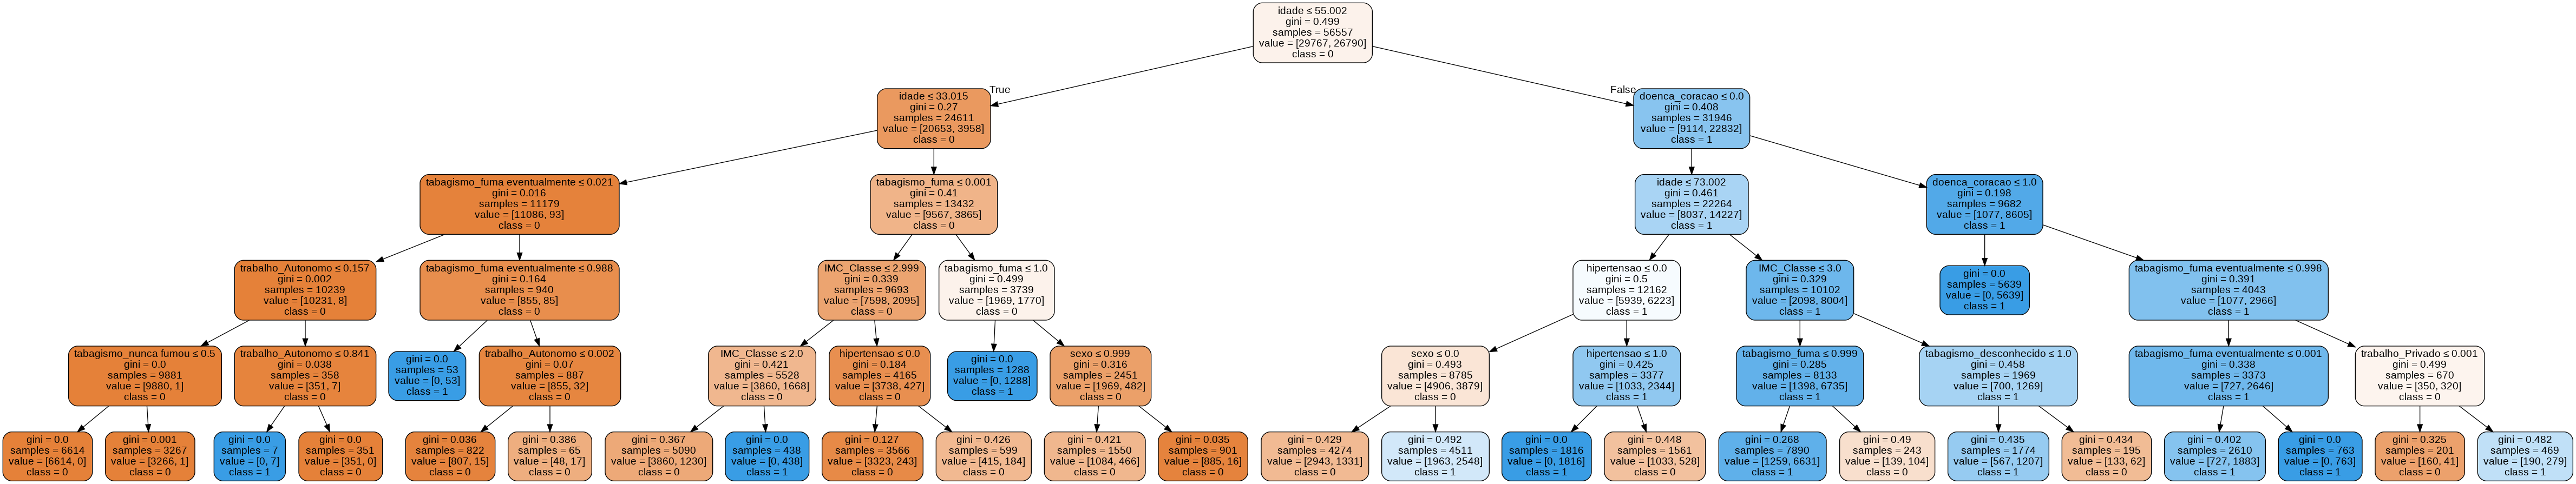

In [151]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(caminho + 'arvore.png')
Image(graph.create_png())

####RandomForestClassifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf = RandomForestClassifier()

In [154]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
rf_predicao = rf.predict(X_test)

In [156]:
print("RandomForest")
rf_accuracy, rf_auc, rf_recall, rf_precision, rf_f1, rf_specificity = print_report(y_test, rf_predicao)

RandomForest
Acurácia:0.974
AUC:0.513
Recall:0.034
Precisão:0.068
F1:0.045
Especificidade:0.991
 


In [157]:
#Matrix de Confusão
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_predicao))

[[12648   110]
 [  227     8]]


In [158]:
#Matrix de Confusão
print(pd.crosstab(y_test, rf_predicao, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        12648  110  12758
1          227    8    235
All      12875  118  12993


In [159]:
# Grava o modelo em disco

import pickle

pickle.dump(rf, open(caminho + 'RandomForest_Modelo.pkl', 'wb'), protocol = 4)